#### References:
    www.python.org
    www.numpy.org
    www.matplotlib.org
    https://pandas.pydata.org
    https://docs.python.org
    https://seaborn.pydata.org
    https://scipy.org

#### Questions/feedback: petert@digipen.edu

# Plot types
- Facet Plot
- Box Plot
- Density Plot
- Violin Plot

## Facet Plots
- The facet plot is a set of plots partitioned into a grid
- Each gridcell shows a different subset of the data
- Subsets should be based on categorical values

Import libraries, including seaborn which is built on matplotlib with even more advanced functionality

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns                 # seaborn is widely aliased as sns
import scipy.stats as ss              # scipy is widely aliased as ss
from matplotlib import pyplot as plt
%matplotlib inline

seaborn comes with a few datasets

Retrieve their names to choose a dataset to work with:

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

Choose and load 'mpg' dataset:

In [4]:
sns.load_dataset?

In [5]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
print("The shape of the dataset is", df.shape)

The shape of the dataset is (398, 9)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Lets find features where there are not too many distinct values:

In [9]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [10]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

We'll use these features to partition the dataset: each value pair will form a partition

Lets find a feature to plot for each partition (subset of the data)

Lets define a facet plot:
- by breaking up the dataset to smaller partitions
    - based on features 'cylinders' and 'origin'
- choose a plot type
    - pick histogram which will describe frequency of a feature's values
- Choose a feature to plot
    - pick 'model_year'

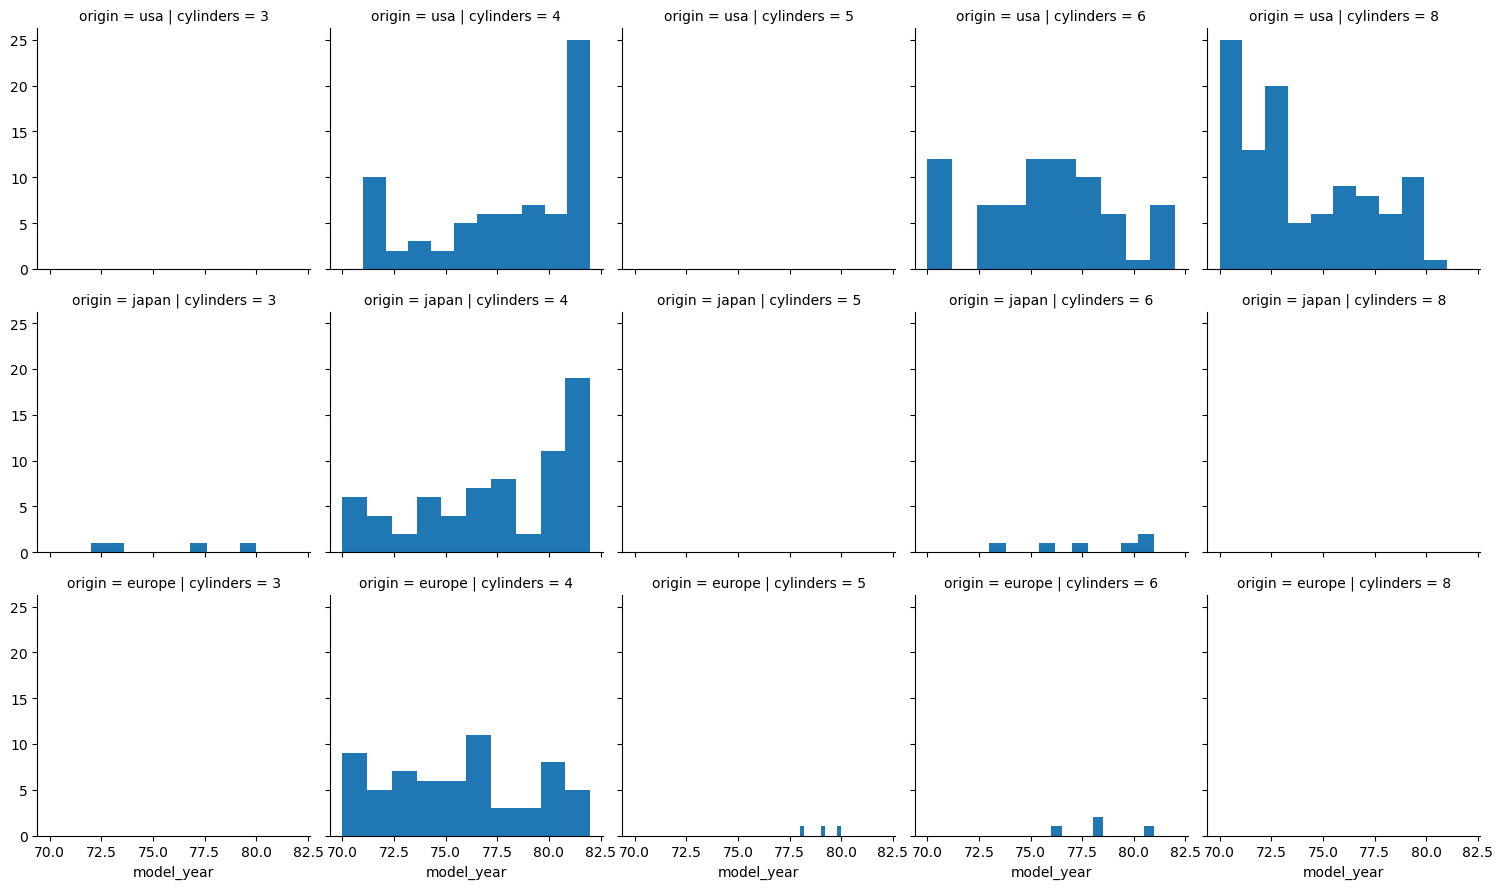

In [11]:
# store a facetgrid partitioning in f
f = sns.FacetGrid(df, row='origin', col='cylinders')
# apply map to invoke the same (histogram plotting) on all parts 
f.map(plt.hist, 'model_year')
plt.show()

Notes:
- the data points in each row of the grid are from the same origin
    - 1st row from USA
    - 2nd row from Japan
    - 3rd row from Europe
- the data points in each column have the same number of cylinders
    - the first column has 3 cylinders
    - the second column has 4 cylinders
    - ...
    - the fifth column has 8 cylinders
- in any of the gridcells there are the combinations of these values/properties, for example:
    - the 3rd row and 2nd column datapoints are originated from Europe with 4 cylinders

Now use a scatterplot instead of a histogram: we'll need two features for scatter plotting

Choose 'mpg' and 'horsepower' where we expect to discover known and explanable relations

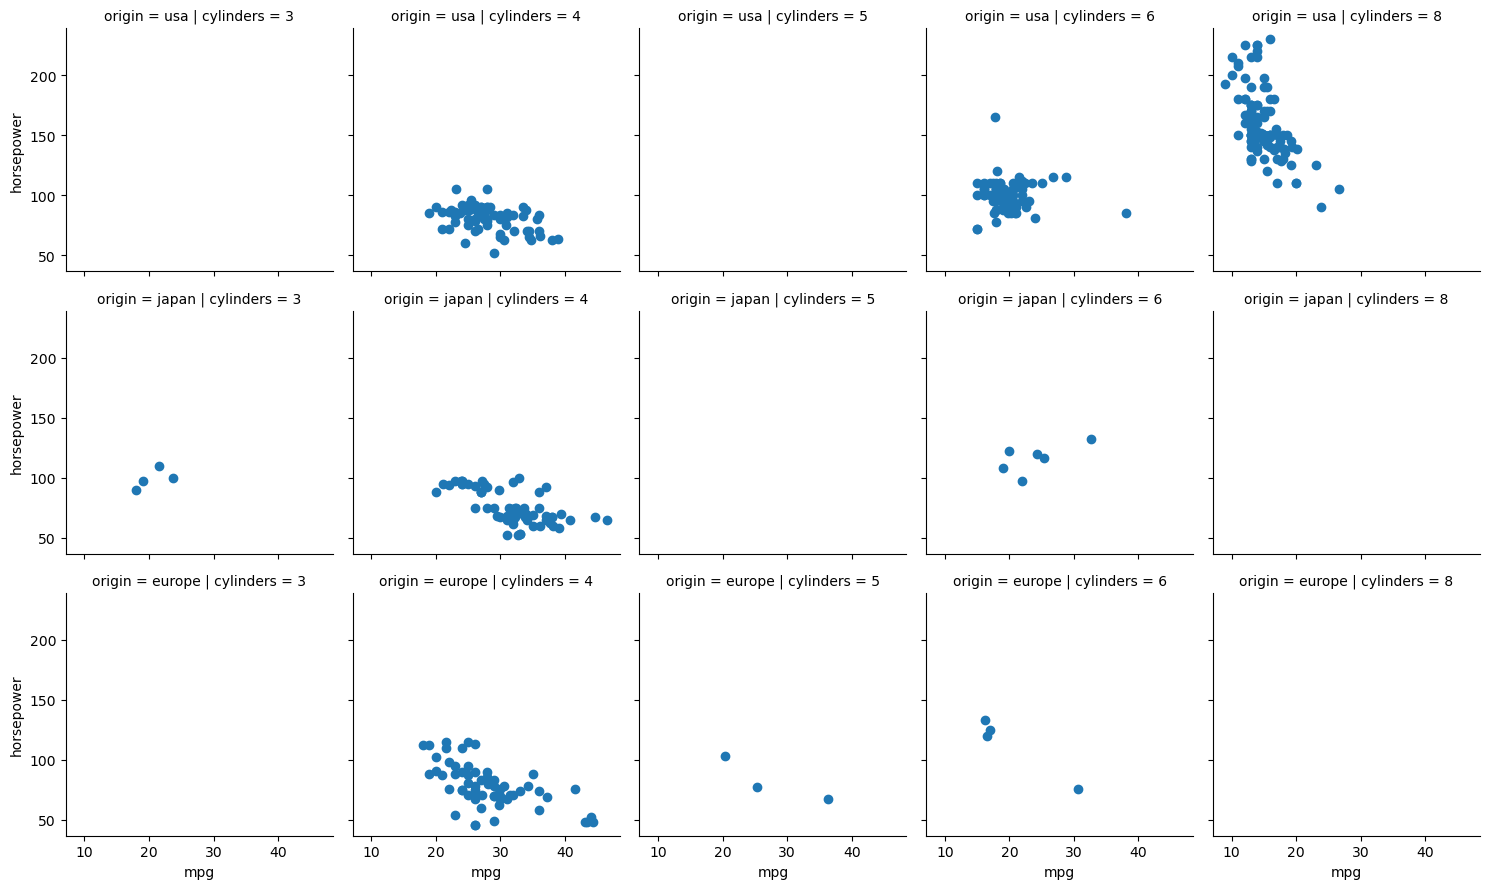

In [12]:
f = sns.FacetGrid(df, row='origin', col='cylinders')
# list the chosen features on x and y axis
f.map(plt.scatter, 'mpg', 'horsepower')
plt.show()

Lets further look into the data:
- There are very few datapoint with 3 or 5 cylinders
    - Lets list these and look at them to see any patterns or just acknowledge them
    - Lets remove them to concentrate to the majority of the data
- There are no datapoint at all in 6 of the grids. Basic statements can be derived (limited to the 'mpg' dataset):
    - Only Japan produces 3 cylinder vehicles
    - Only Europe produces 5 cylinder vehicles
    - Only USA produces 8 cylinder vehicles
- There are two outlier/anomaly looking datapoints visibly present in 1st row 4th column
    - There is one vehicle with much higher mpg than the rest in the same grid
    - There is one vehicle with much higher horsepower than the rest in the same grid
    - We should locate these to see if data is correct at all or else it make sense these are different than the rest

Lets look at these first:
- origin = 'japan AND cylinders = 3
- origin = 'europe AND cylinders = 5

In [13]:
df[df['cylinders']==3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
71,19.0,3,70.0,97.0,2330,13.5,72,japan,mazda rx2 coupe
111,18.0,3,70.0,90.0,2124,13.5,73,japan,maxda rx3
243,21.5,3,80.0,110.0,2720,13.5,77,japan,mazda rx-4
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs


In [14]:
df[df['cylinders']==5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
274,20.3,5,131.0,103.0,2830,15.9,78,europe,audi 5000
297,25.4,5,183.0,77.0,3530,20.1,79,europe,mercedes benz 300d
327,36.4,5,121.0,67.0,2950,19.9,80,europe,audi 5000s (diesel)


Lets drop these to concentrate to the majority of the data

In [15]:
# repurpose the dataframe based on 'cylinders' conditions
# keep the observations where the cylinder count is not 3 or 5
df = df[df['cylinders']!=5]
df = df[df['cylinders']!=3]
# double check on the shape to see if we have 7 less observations now
df.shape

(391, 9)

Lets plot again with the trimmed dataset:

<Figure size 384x288 with 0 Axes>

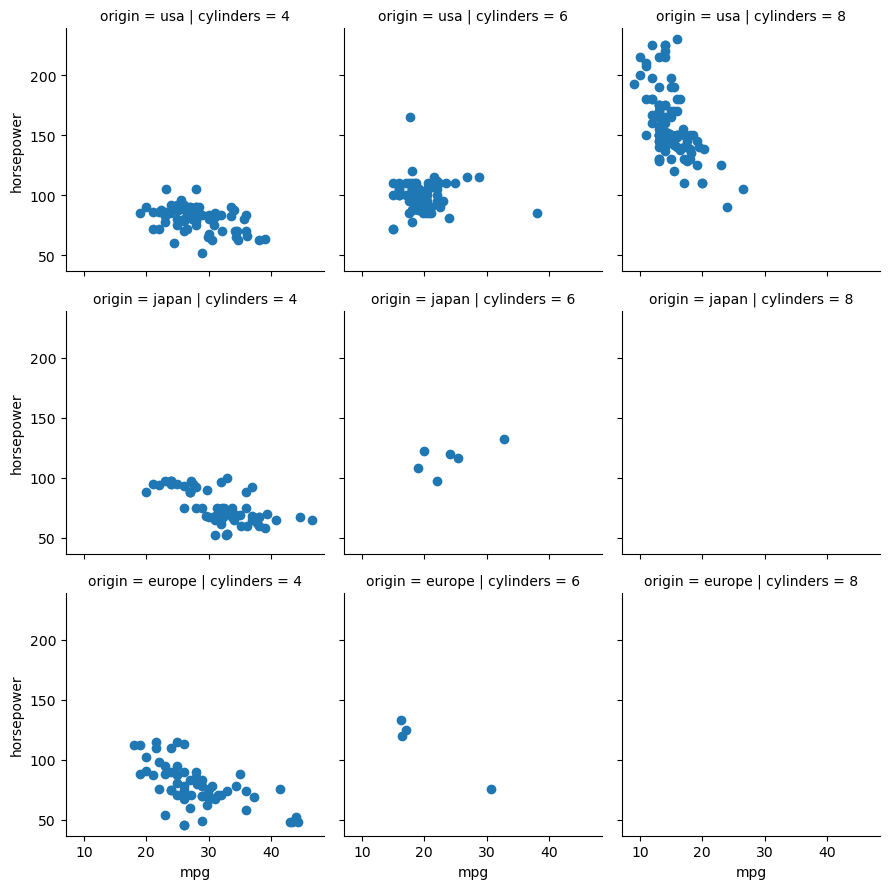

In [16]:
plt.figure(dpi=60)
f = sns.FacetGrid(df, row='origin', col='cylinders')
f.map(plt.scatter, 'mpg', 'horsepower')
plt.show()

The result look neater and more easily interpretable

Lets check on the two ouliers in 1st row 2nd column (origin = usa AND cylinders = 6):

In [17]:
# datapoints in the 1st row 2nd column grid
df[(df['cylinders']==6) & (df['origin']=='usa')]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
15,22.0,6,198.0,95.0,2833,15.5,70,usa,plymouth duster
16,18.0,6,199.0,97.0,2774,15.5,70,usa,amc hornet
17,21.0,6,200.0,85.0,2587,16.0,70,usa,ford maverick
24,21.0,6,199.0,90.0,2648,15.0,70,usa,amc gremlin
33,19.0,6,232.0,100.0,2634,13.0,71,usa,amc gremlin
...,...,...,...,...,...,...,...,...,...
365,20.2,6,200.0,88.0,3060,17.1,81,usa,ford granada gl
366,17.6,6,225.0,85.0,3465,16.6,81,usa,chrysler lebaron salon
386,25.0,6,181.0,110.0,2945,16.4,82,usa,buick century limited
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel)


In [18]:
# sort on 'mpg' values starting with the highest
(df[(df['cylinders']==6) & (df['origin']=='usa')]).sort_values('mpg', ascending=False)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel)
306,28.8,6,173.0,115.0,2595,11.3,79,usa,chevrolet citation
307,26.8,6,173.0,115.0,2700,12.9,79,usa,oldsmobile omega brougham
386,25.0,6,181.0,110.0,2945,16.4,82,usa,buick century limited
193,24.0,6,200.0,81.0,3012,17.6,76,usa,ford maverick
...,...,...,...,...,...,...,...,...,...
161,16.0,6,250.0,105.0,3897,18.5,75,usa,chevroelt chevelle malibu
128,15.0,6,250.0,100.0,3336,17.0,74,usa,chevrolet nova
154,15.0,6,250.0,72.0,3432,21.0,75,usa,mercury monarch
162,15.0,6,258.0,110.0,3730,19.0,75,usa,amc matador


... or just retrieve the top item which is the answer to the task:
- Find the observation with the highest 'mpg' where the origin is USA and the number of cylinders are 6

In [19]:
# sort on 'mpg' values starting with the highest
(df[(df['cylinders']==6) & (df['origin']=='usa')]).sort_values('mpg', ascending=False).head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel)


So we see that "oldsmobile cutlass ciera (diesel)" is the item we were looking for. It's feasible this has the highest 'mpg' being diesel in its name.

Similarly, the answer to the other task:

Find the observation with the highest 'horsepower' where the origin is USA and the number of cylinders are 6

In [20]:
(df[(df['cylinders']==6) & (df['origin']=='usa')]).sort_values('horsepower', ascending=False).head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
263,17.7,6,231.0,165.0,3445,13.4,78,usa,buick regal sport coupe (turbo)


Also feasible to have a highest horsepower in its group just judging by its name have "sport" and "turbo"

It looks like we don't have incorrect data (regarding the two suspected datapoints) present in the specific facet grid.

Lets look at the rest of the grid cells

Visual inspection suggest there may be a linear relationship between 'mpg' and horsepower but not for all different  cylinder counts
- 4 cylinder vehicles show linear like relationship between fuel consumption and horse power:
    - The higher the horsepower, the less is the number of miles it can travel using a gallon of fuel
- 8 cylinder vehicles show a near linear but not fully linear relation
    - The higher the horsepower, even less is the number of miles it can travel using a gallon of fuel

## Box Plot (box-and-whiskers)
- showing groups of numerical data
- showing median and mean
- grouped by quartiles
- variability (whiskers)
- outliers (outside of whiskers)

- boxplots were introduced by <a href='https://en.wikipedia.org/wiki/John_Tukey'>John Tukey</a> in the 70's

Calculating lower, inter and upper quartile boundaries based on 50% and 99.3%:

In [21]:
import scipy.stats as ss

In [22]:
ss.norm.cdf?

In [23]:
ss.norm.cdf(0)

0.5

In [24]:
ss.norm.cdf(1) - ss.norm.cdf(-1)

0.6826894921370859

In [25]:
ss.norm.cdf(0.6745, 0, 1) - ss.norm.cdf(-0.6745, 0, 1)

0.5000065142726018

In [26]:
4 * -0.6745

-2.698

In [27]:
print(ss.norm.cdf(0.6745, 0, 1) - ss.norm.cdf(-0.6745, 0, 1))
v = 0.6745
vl = -v - 1.5 * 2 * v
vu = +v + 1.5 * 2 * v
print(ss.norm.cdf(2.698,  0, 1) - ss.norm.cdf(-2.698,  0, 1))

0.5000065142726018
0.9930242559336102


Simulate using 10,000 random generated numbers (normal distribution, 0 mean and 1 std):

In [28]:
data = np.random.randn(1000000)

In [29]:
data

array([-0.19947179,  0.24685815,  1.90214506, ..., -0.32060471,
       -0.60989836,  0.85410923])

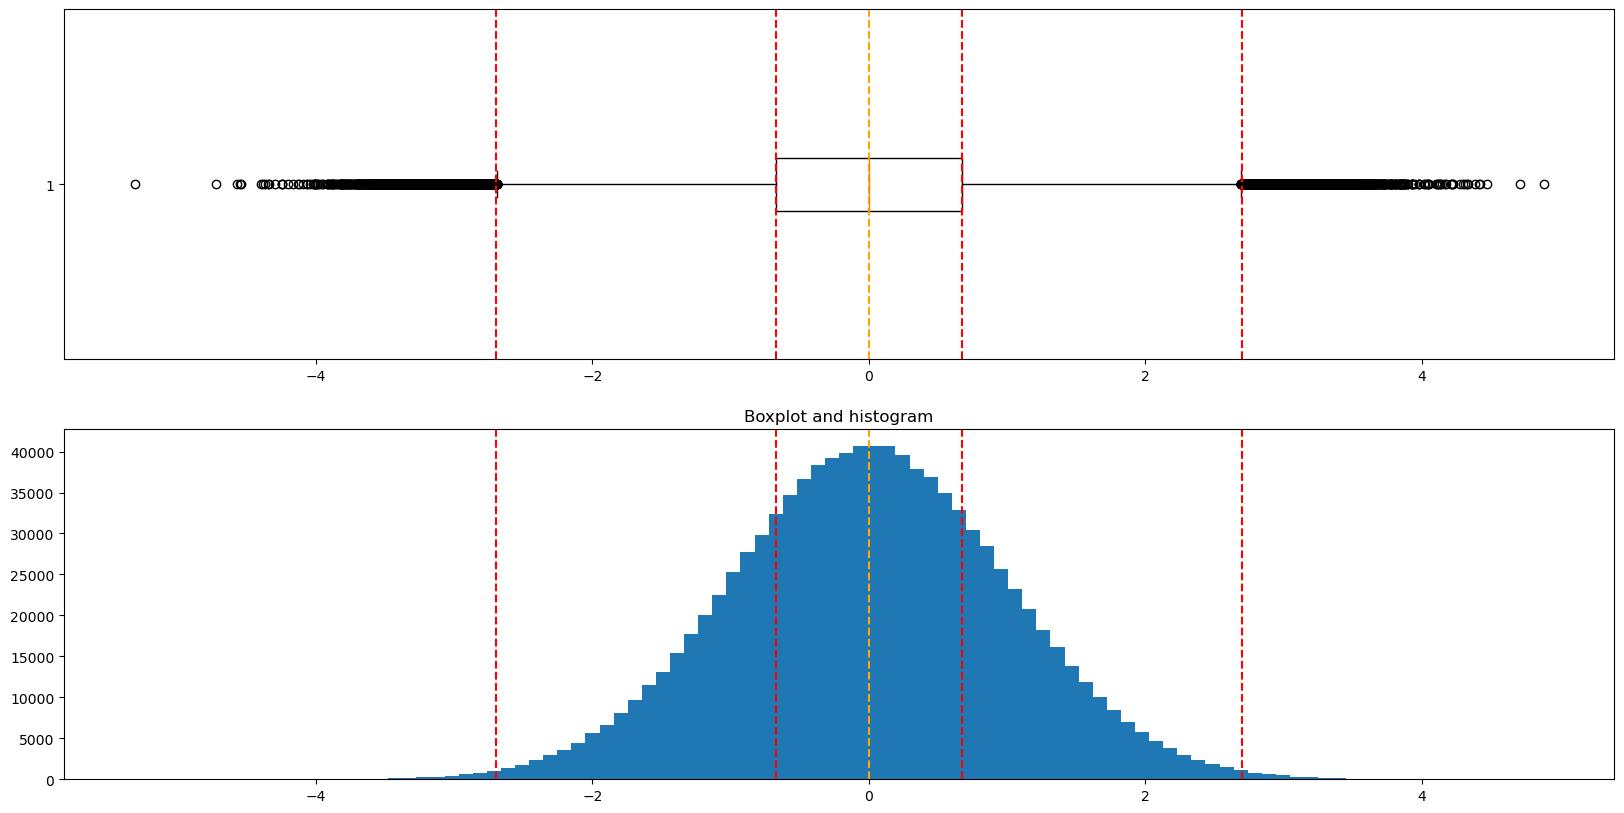

In [30]:
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(20,10))
plt.title('Boxplot and histogram')

ax[0].boxplot(data, vert=False)
ax[1].hist(data, bins=100)

ax[1].axvline(x=0, color='orange', linestyle='--')
ax[1].axvline(x=-v, color='red', linestyle='--')
ax[1].axvline(x=+v, color='red', linestyle='--')
ax[1].axvline(x=vl, color='red', linestyle='--')
ax[1].axvline(x=vu, color='red', linestyle='--')

ax[0].axvline(x=0, color='orange', linestyle='--')
ax[0].axvline(x=-v, color='red', linestyle='--')
ax[0].axvline(x=+v, color='red', linestyle='--')
ax[0].axvline(x=vl, color='red', linestyle='--')
ax[0].axvline(x=vu, color='red', linestyle='--')

plt.show()

Run another simulation using 200 numbers:
- 150 uniformly distributed between 0 and 100
- 25 added at value 50
- 10 added with higher values
- 15 added with lower values

In [31]:
# generate 150 random numbers
np.random.seed(98007)
data = np.random.rand(150) * 100

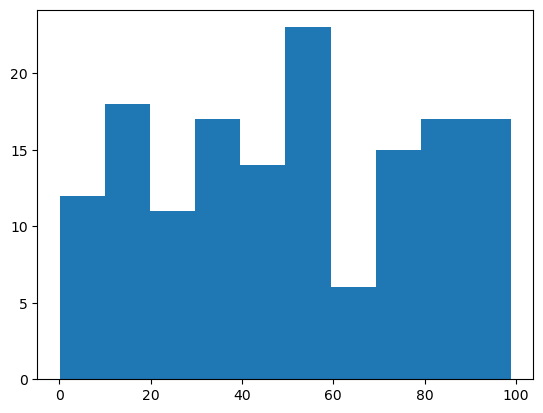

In [32]:
plt.hist(data)
plt.show()

In [33]:
# generate more to fall in the middle, upper and lower segments:
middle =  np.ones(25) * 50
upper  =  np.random.rand(15) * 100 + 100
lower  = -np.random.rand(10) * 100

In [34]:
middle

array([50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.])

In [35]:
# merge the numbers into one data container (numpy array)
data = np.concatenate((data, middle, upper, lower))
data.shape

(200,)

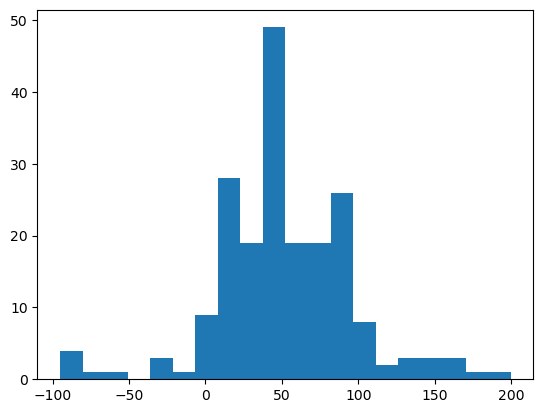

In [36]:
plt.hist(data, bins=20)
plt.show()

Now plot a boxplot using this data:

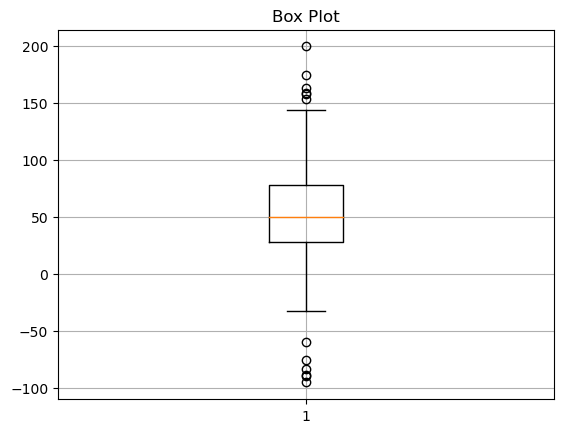

In [37]:
plt.figure(dpi=100)
plt.boxplot(data)
plt.title('Box Plot')
plt.grid()
plt.show()

In [38]:
pd.DataFrame(data).describe()

,0
count,200.000000
mean,51.978206
std,44.232189
min,-95.131606
25%,28.325520
50%,50.000000
75%,78.303425
max,199.830985


Notice the
- Median line displayed at value 50
- the Inter Quartile box showing the 50% of the data with its range
    - Lower Quartile
    - Upper Quartile
- Min and Max values (not counting outliers) displayed by the lower and upper whiskers
- Outliers outside of the whiskers

Some customization:
- display mean and mean line
- display notch (confidence interval)
- marker style and color
- hide/display outliers
- vertical / horizontal layout
- whisker size

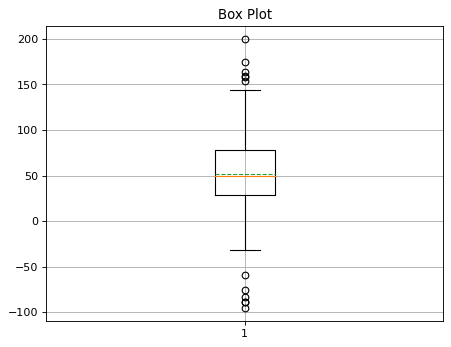

In [39]:
# mean and meanline
plt.figure(dpi=80)
plt.boxplot(data, showmeans=True, meanline=True)
plt.title('Box Plot')
plt.grid()
plt.show()

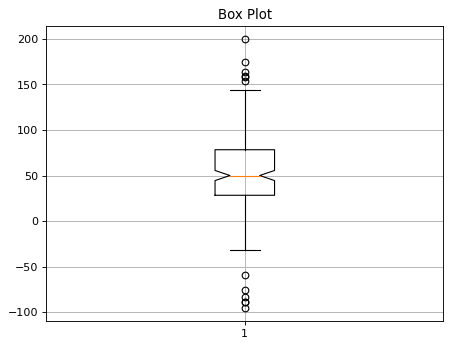

In [40]:
# display notch (CI)
plt.figure(dpi=80)
plt.boxplot(data, notch=True)
plt.grid()
plt.title('Box Plot')
plt.show()

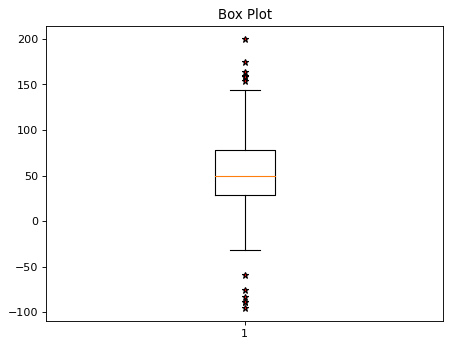

In [41]:
# outliers color and marker
plt.figure(dpi=80)
plt.boxplot(data, flierprops=dict(markerfacecolor='red', marker='*'))
plt.title('Box Plot')
plt.show()

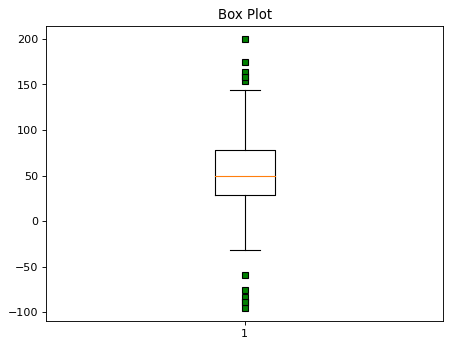

In [42]:
# hide outliers
plt.figure(dpi=80)
plt.boxplot(data, flierprops=dict(markerfacecolor='green', marker='s'), showfliers=True)
plt.title('Box Plot')
plt.show()

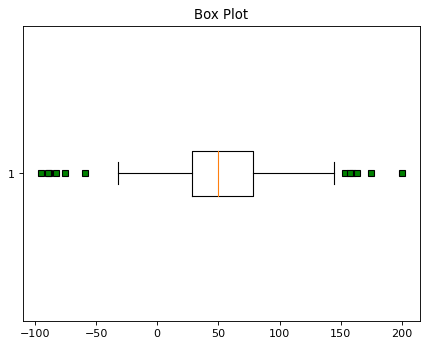

In [43]:
# horizontal layout
plt.figure(dpi=80)
plt.boxplot(data, flierprops=dict(markerfacecolor='green', marker='s'),
            showfliers=True, vert=False)
plt.title('Box Plot')
plt.show()

In [44]:
plt.boxplot?

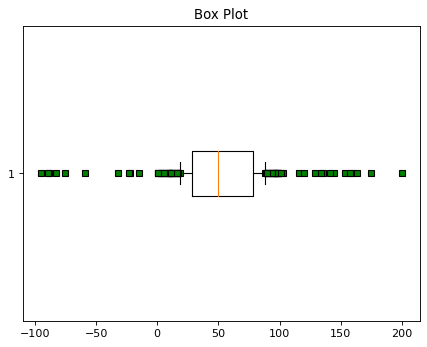

In [45]:
# changing the whisker size
plt.figure(dpi=80)
plt.boxplot(data, flierprops=dict(markerfacecolor='green', marker='s'),
            showfliers=True, vert=False, whis=0.2)
plt.title('Box Plot')
plt.show()

Box plot using seaborn:

In [46]:
sns.boxplot?

In [47]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


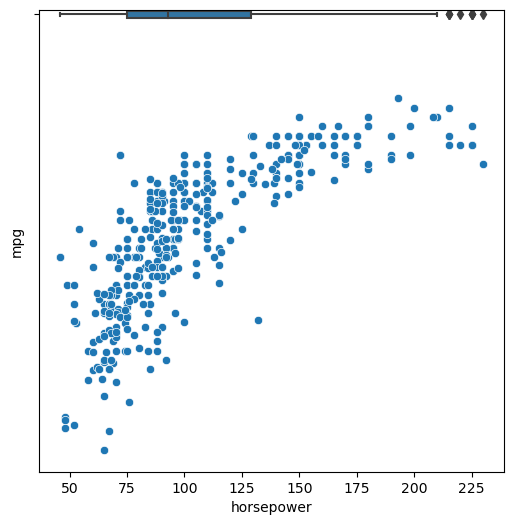

In [48]:
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
sns.boxplot(x=df['horsepower'], orient='h')
sns.scatterplot(x=df['horsepower'], y=df['mpg'])
plt.show()

Breaking up by a categorical feature:

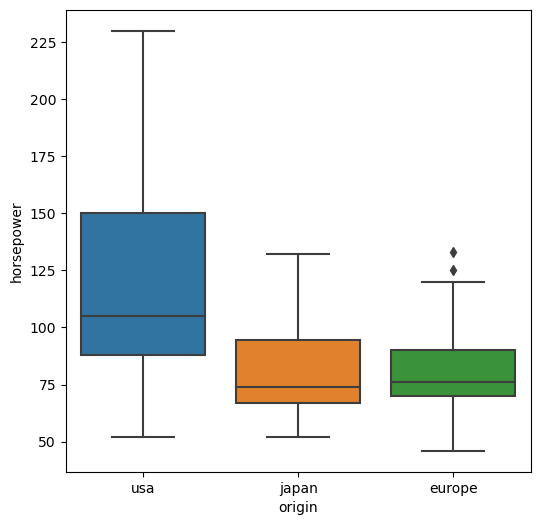

In [49]:
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
sns.boxplot(x=df['origin'], y=df['horsepower'])
#ax.set_xlabel('origin')
#ax.set_ylabel('horsepower')
plt.show()

## Density Plot
- shows the distribution of data over a continuous interval
- a variation of a histogram
- smoothed

A kernel density estimate (KDE) plot is a method for visualizing the
distribution of observations in a dataset, analagous to a histogram. KDE
represents the data using a continuous probability density curve in one (or
more) dimensions.

Relative to a histogram, KDE can produce a plot that is less cluttered and
more interpretable, especially when drawing multiple distributions. But it
has the potential to introduce distortions if the underlying distribution is
bounded or not smooth. Like a histogram (using binwidth), the quality of the representation
also depends on the selection of good smoothing parameters (bandwidth).

In [48]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


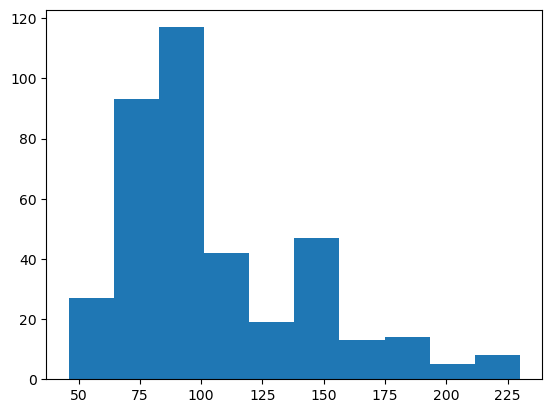

In [49]:
plt.hist(df['horsepower'])
plt.show()

In [50]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,391.000000,391.000000,391.000000,385.000000,391.000000,391.000000,391.000000
mean,23.515345,5.483376,195.034527,104.696104,2975.255754,15.568286,75.992327
std,7.847549,1.697390,104.359251,38.756634,851.650477,2.753770,3.706189
min,9.000000,4.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2221.500000,13.950000,73.000000
50%,23.000000,4.000000,151.000000,93.000000,2807.000000,15.500000,76.000000
75%,29.000000,8.000000,284.500000,129.000000,3616.500000,17.150000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [51]:
df['horsepower'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 391, dtype: bool

In [52]:
df[df['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [53]:
df2 = df[df['horsepower'].isna() == False]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           391 non-null    float64
 1   cylinders     391 non-null    int64  
 2   displacement  391 non-null    float64
 3   horsepower    385 non-null    float64
 4   weight        391 non-null    int64  
 5   acceleration  391 non-null    float64
 6   model_year    391 non-null    int64  
 7   origin        391 non-null    object 
 8   name          391 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.5+ KB


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           385 non-null    float64
 1   cylinders     385 non-null    int64  
 2   displacement  385 non-null    float64
 3   horsepower    385 non-null    float64
 4   weight        385 non-null    int64  
 5   acceleration  385 non-null    float64
 6   model_year    385 non-null    int64  
 7   origin        385 non-null    object 
 8   name          385 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.1+ KB


In [56]:
df2.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,23.445455,5.501299,196.063636,104.696104,2982.620779,15.541039,75.961039
std,7.836911,1.701906,104.725306,38.756634,854.275138,2.754906,3.692058
min,9.000000,4.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2223.000000,13.900000,73.000000
50%,23.000000,4.000000,151.000000,93.000000,2807.000000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3630.000000,17.000000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
sns.kdeplot?

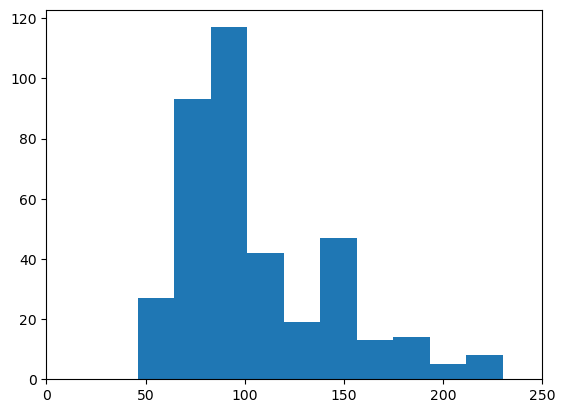

In [57]:
plt.hist(df2['horsepower'])
plt.xlim(0, 250)
plt.show()

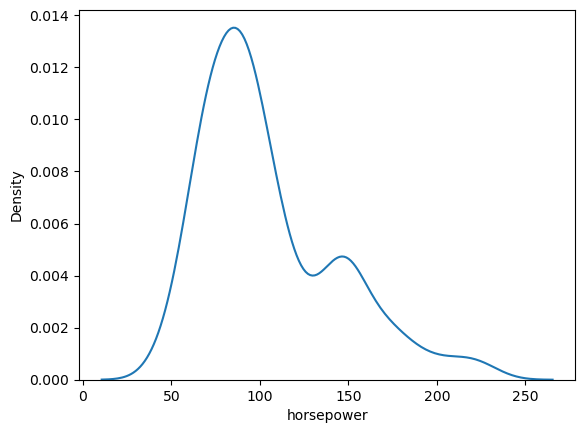

In [58]:
sns.kdeplot(df2['horsepower'])
plt.show()

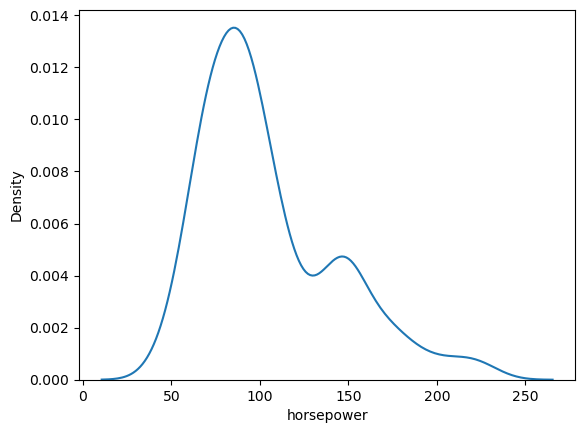

In [59]:
sns.kdeplot(df2['horsepower'], bw_adjust=1)
plt.show()

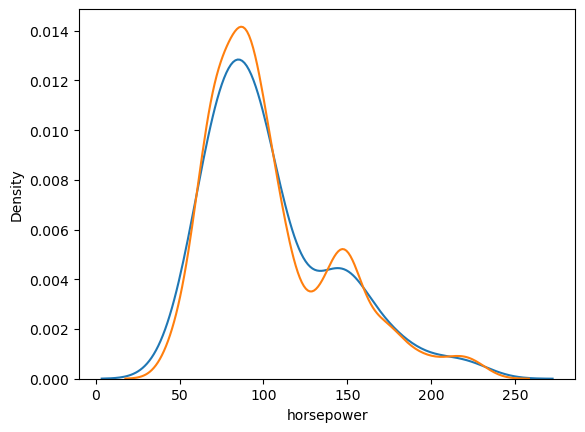

In [60]:
# changing the bandwidth parameter
sns.kdeplot(df['horsepower'], bw_adjust=1.2)
sns.kdeplot(df['horsepower'], bw_adjust=0.8)
plt.show()

Note that KDE's default bandwidth (bw_adjust) is 1, corresponding to histograms default number of bins (bins) which is 10

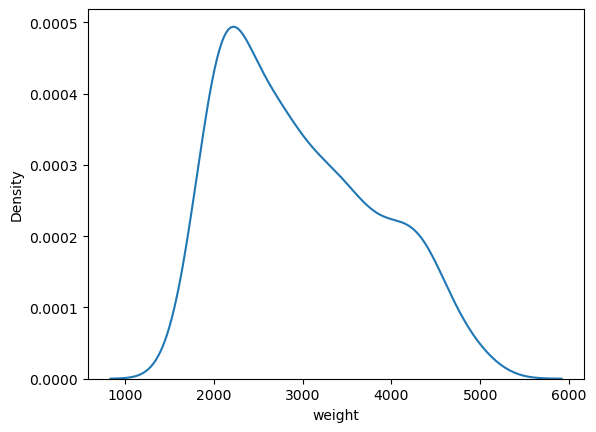

In [61]:
#plt.hist(df['weight'])
sns.kdeplot(df['weight'])
plt.show()

In [62]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [63]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [64]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,391.000000,391.000000,391.000000,385.000000,391.000000,391.000000,391.000000
mean,23.515345,5.483376,195.034527,104.696104,2975.255754,15.568286,75.992327
std,7.847549,1.697390,104.359251,38.756634,851.650477,2.753770,3.706189
min,9.000000,4.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2221.500000,13.950000,73.000000
50%,23.000000,4.000000,151.000000,93.000000,2807.000000,15.500000,76.000000
75%,29.000000,8.000000,284.500000,129.000000,3616.500000,17.150000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
sns.kdeplot?

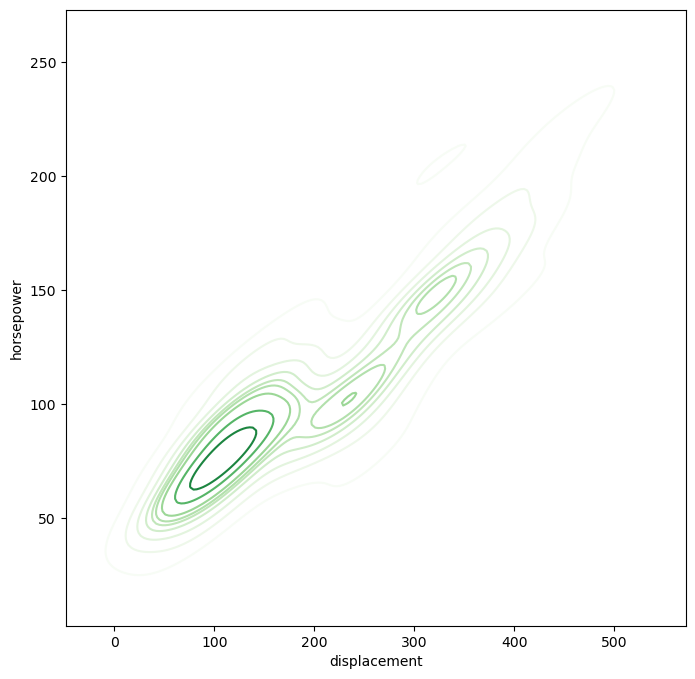

In [65]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
sns.kdeplot(x=df2['displacement'], y=df2['horsepower'], ax=ax, cmap='Greens')
plt.show()

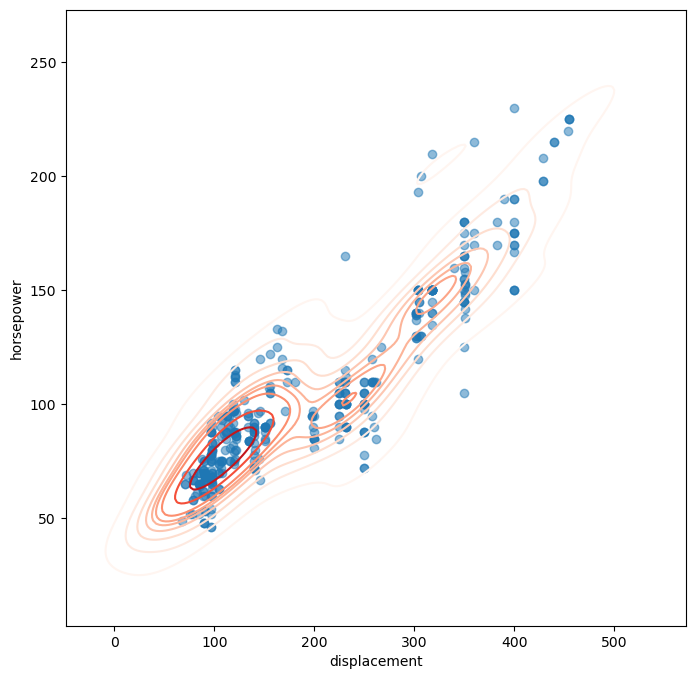

In [66]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
sns.kdeplot(x=df2['displacement'], y=df2['horsepower'], ax=ax, cmap='Reds')
plt.scatter(df2['displacement'], df2['horsepower'], alpha=0.5)
plt.show()

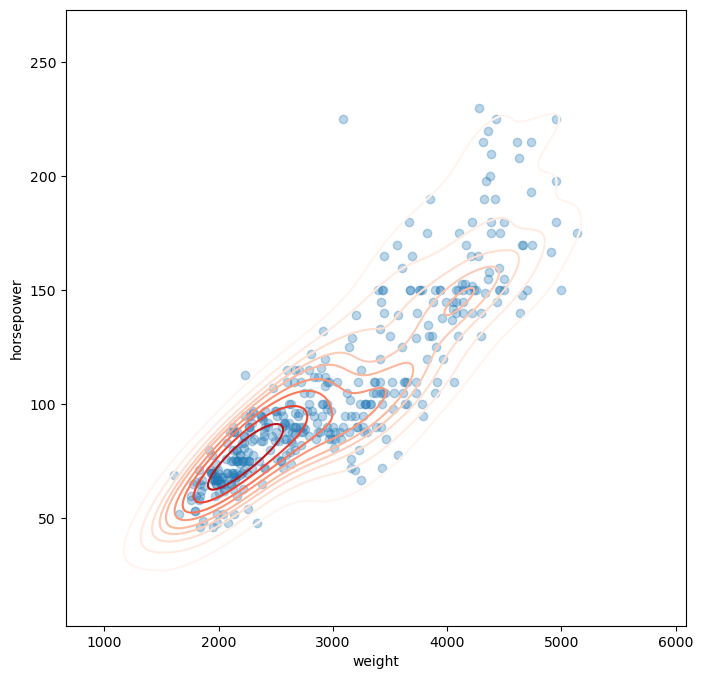

In [67]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
sns.kdeplot(x=df2['weight'], y=df2['horsepower'], ax=ax, cmap='Reds')
plt.scatter(df2['weight'], df2['horsepower'], alpha=0.3)
plt.show()

In [68]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


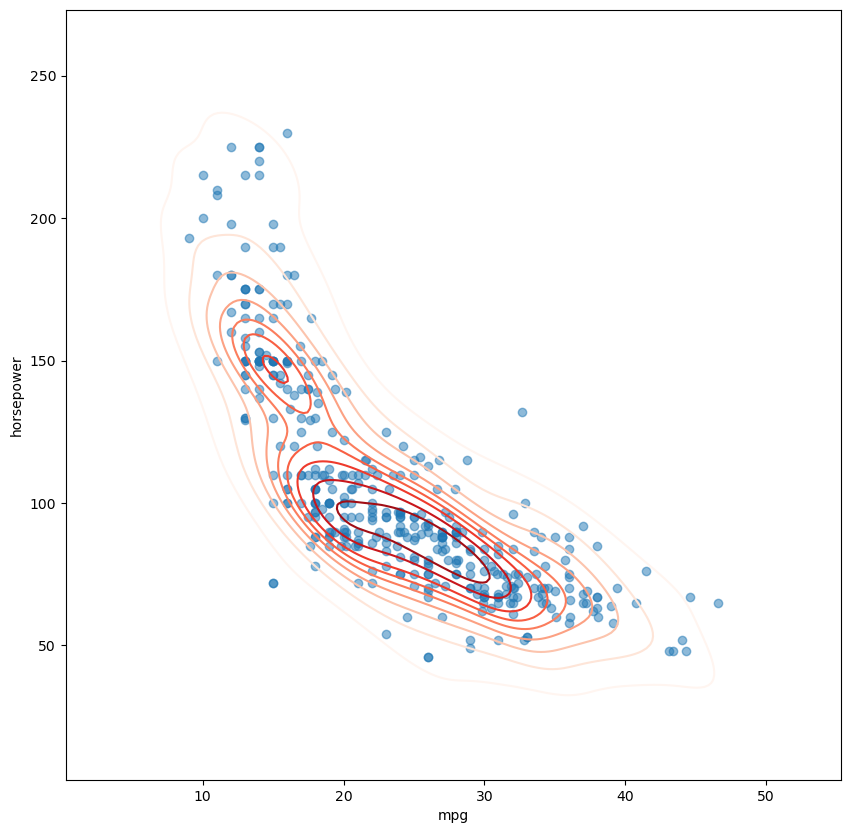

In [69]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
sns.kdeplot(x=df2['mpg'], y=df2['horsepower'], ax=ax, cmap='Reds')
plt.scatter(df2['mpg'], df2['horsepower'], alpha=0.5)
plt.show()

## Violin Plot
- a combination of box plot and density plot
- two dimensions
- smoothed

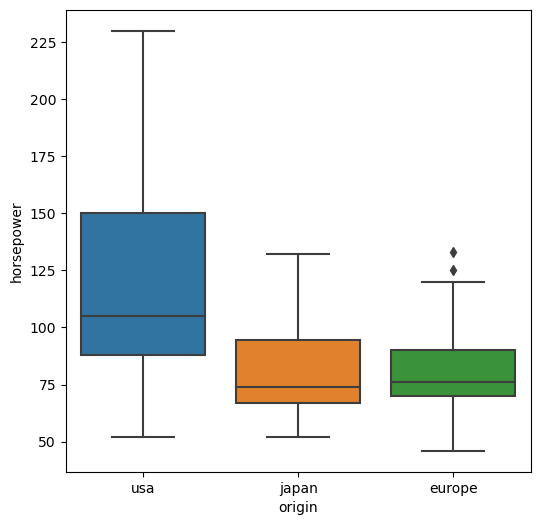

In [70]:
# boxplots grouped by origin
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
sns.boxplot(x=df2['origin'], y=df2['horsepower'])
ax.set_xlabel('origin')
ax.set_ylabel('horsepower')
plt.show()

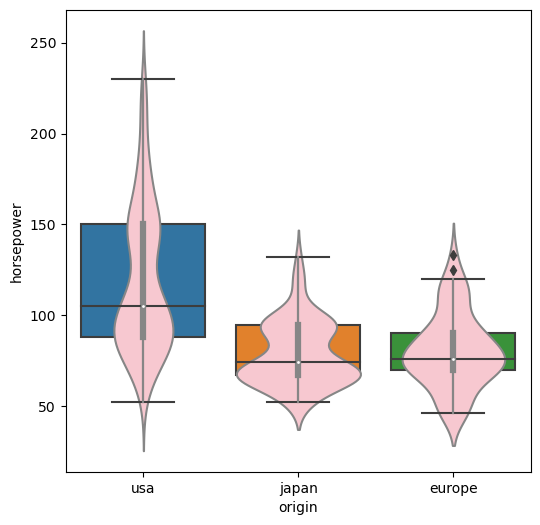

In [71]:
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
sns.boxplot(x=df2['origin'], y=df2['horsepower'])
#sns.violinplot(y=df2['horsepower'], color='lightgreen')
sns.violinplot(x=df2['origin'], y=df2['horsepower'], color='pink')
ax.set_xlabel('origin')
ax.set_ylabel('horsepower')
plt.show()

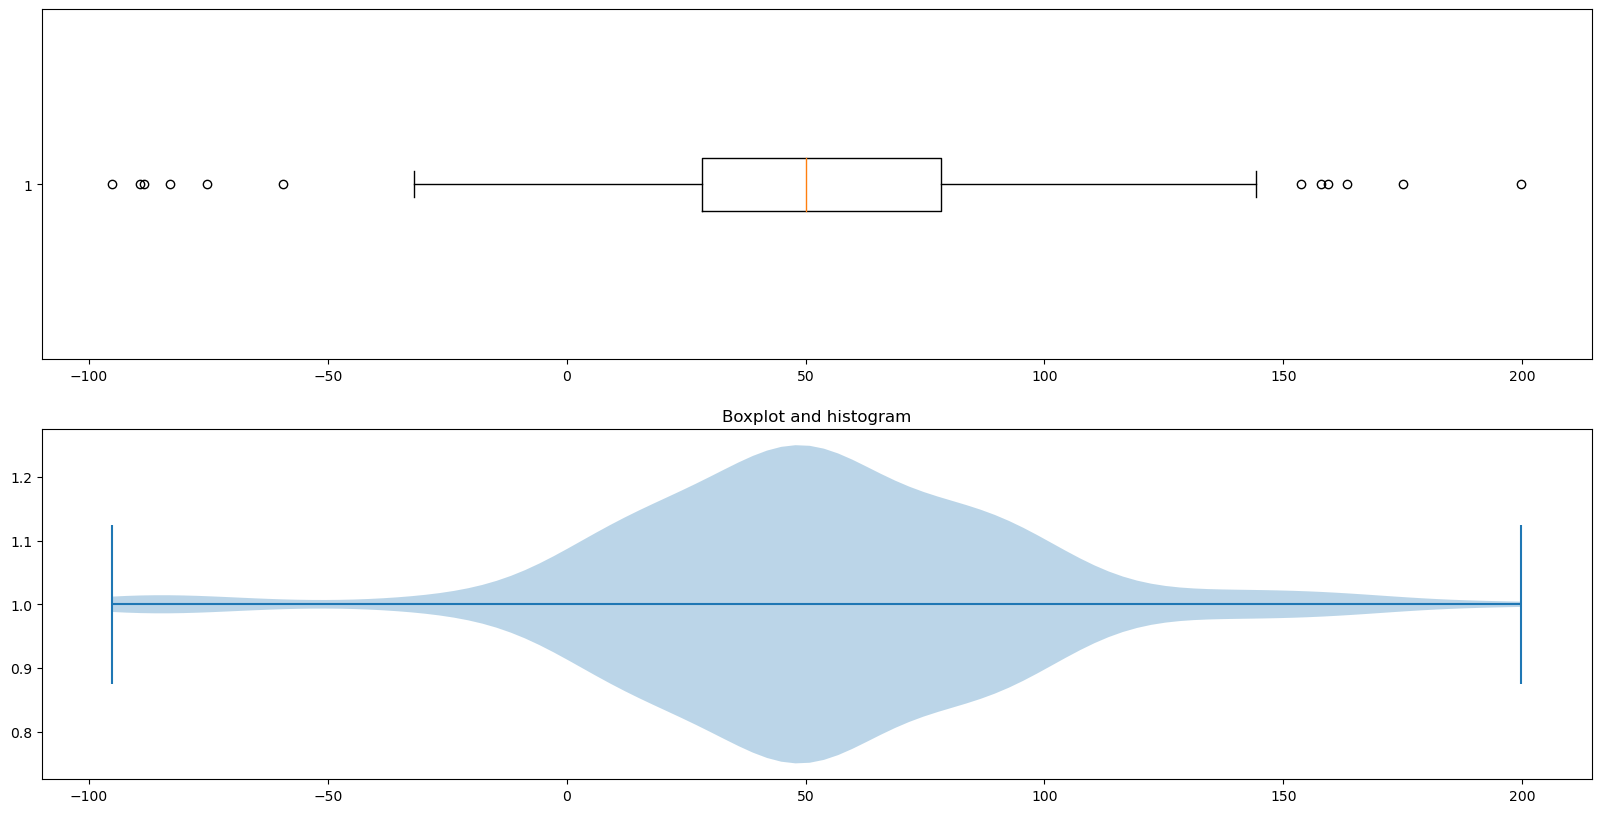

In [79]:
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(20,10))
plt.title('Boxplot and histogram')

ax[0].boxplot(data, vert=False)
ax[1].violinplot(data, vert=False)

plt.show()

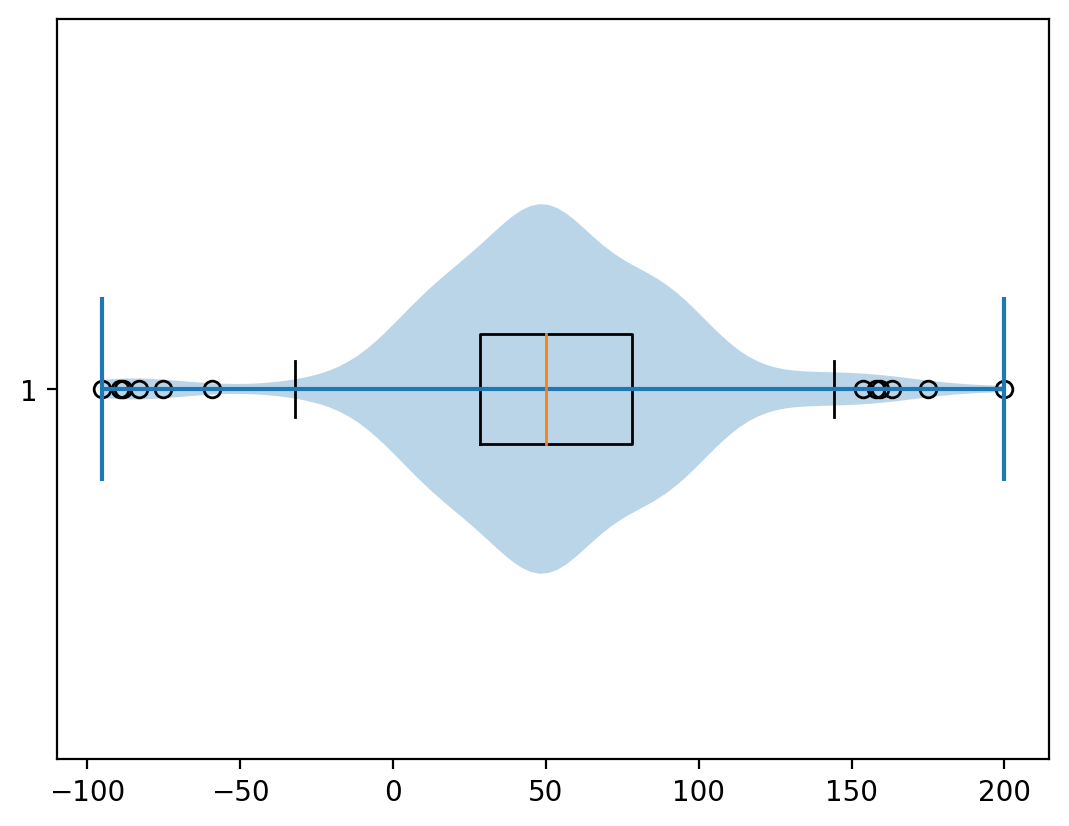

In [73]:
plt.figure(dpi=200)
plt.boxplot(data, vert=False)
plt.violinplot(data, vert=False)
plt.show()

In [ ]:
sns.violinplot?

#### Exercise 19.1:
Display faceted plots using the 'mpg' or another dataset:
- pick 2 categorical features to groupby on x and y axis
- pick 1 feature and display histogram in the group combination grid cells
- pick 2 features and display scatter (or other type of) plots in the group combination grid cells

Decorate the plot as much as possible

In [ ]:
# Exercise 19.1 code:



#### Exercise 19.2:
Display
- two plots
    - one scatter plot
    - one density plot
- each using the same two features 
- in one figure

In [ ]:
# Exercise 19.2 code:



#### Exercise 19.3:
Display
- two plots
    - one box plot
    - one violin plot
- each using the same feature
- in one figure

In [ ]:
# Exercise 19.3 code:

